<a href="https://colab.research.google.com/github/YunmeiHuanghi/Austin_Deep_Learning_notes/blob/main/Austin_linear_regression_in_action_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pylab inline
import torch


Populating the interactive namespace from numpy and matplotlib


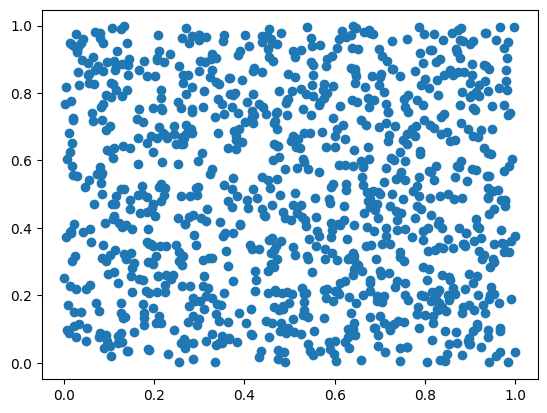

In [3]:
x = torch.rand(1000,2)
scatter(*x.numpy().T)


In [4]:
x_in_circle =(x**2).sum(1)<1
def show(y):
  scatter(*x.numpy().T,c=x_in_circle.numpy())
  axis('equal')

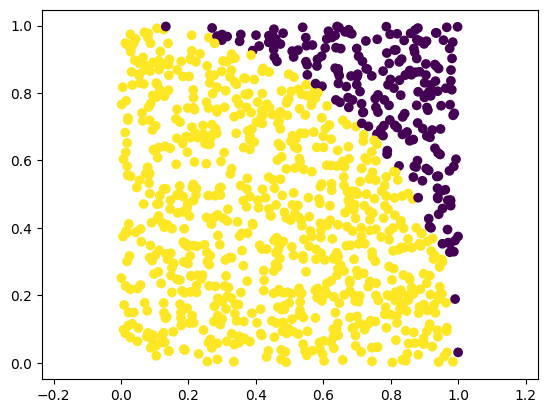

In [5]:
show(x_in_circle)

In [6]:
weights=torch.as_tensor([-1,1],dtype=torch.float)
bias = torch.as_tensor(1,dtype=torch.float)
def classfiy(x,weights,bias):
  logit= (x* weights[None,:]).sum(1)+bias
  return logit>0

def accuracy(pred_y):
  return(pred_y == x_in_circle).float().mean()

def predict(x,weights,bias):
  logit= (x* weights[None,:]).sum(1)+bias
  return  1/(1+(-logit).exp())

def loss(p_y):
  return  -(x_in_circle.float()* (p_y +1e-10).log()+
            (1-x_in_circle.float()) * (1-p_y+1e-10).log())
pred_y =classfiy(x,weights,bias)

accuracy = tensor(0.7880)


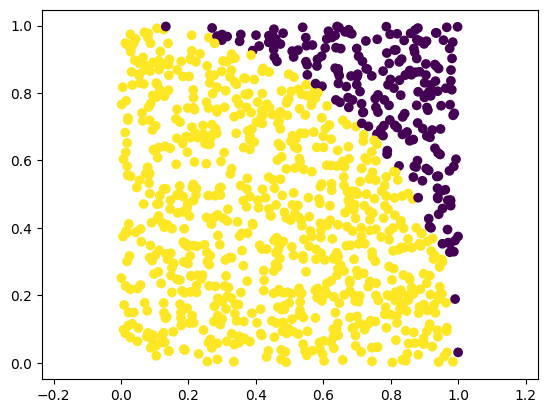

In [7]:
show(pred_y)
print("accuracy =",accuracy(pred_y))

In [8]:
%load_ext tensorboard


import torch.utils.tensorboard as tb
import tempfile
import numpy as np

%tensorboard --logdir{log_dir} --reload_interval 1


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-07-07 02:21:00.894601: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]

## gradient descent


In [9]:
# todo - set up logging
log_dir ='content/'
logger =tb.SummaryWriter(log_dir+'/linear',flush_secs=1)
# setup the model
weights =torch.as_tensor([-1,1],dtype=torch.float)
bias =torch.as_tensor(1.0,dtype=torch.float)
import matplotlib.pyplot as plt

def figure(x):
  plt.plot(x)
  plt.show()


for iteration in range(5000):
  # predict labels
  pred_y =classfiy(x,weights,bias)
  p_y =predict(x,weights,bias)

  # compute the loss
  l =loss(p_y)
  # logging
  print(iteration)
  logger.add_scalar('loss',l,global_step=iteration)
  logger.add_Scalar('accuracy',accuracy(pred_y),global_Step=iteration)

  if iteration%10 == 0:
    fig =figure()
    show(pred_y)
    logger.add_figure("pred_y",fig,global_step=iteration)
    logger.add_figure()
    del fig
    # compute the gradient
    gradient_l_f = p_y-y
    gradient_b = gradient_l_f.mean(0)
    gradient_w = (gradient_l_f[:,None]*x).mean(0)

    # update weight using GD

    weights -=0.5 * gradient_w
    bias  -= 0.5 * gradient_b
show(pred_y)

0


AssertionError: ignored